<a href="https://colab.research.google.com/github/itsmepriyabrata/priyabrata_ai_python/blob/main/Data_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Warehouse_and_Retail_Sales.csv')
print("Dataset preview:")
print(df.head())

print("\nColumn names:")
print(df.columns)

print("\nMissing values in the dataset:")
print(df.isnull().sum())
print("\nBasic statistics of the dataset:")
print(df.describe())


Dataset preview:
   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL TRANSFERS  WAREHOUSE SALES  
0               0.0              2.0  
1               1.0              4.0  
2               0.0              1.0  
3               0.0              1.0  
4           

Data Cleaning

In [3]:
df_cleaned = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df_cleaned = df_cleaned.dropna()

df_cleaned = df_cleaned.drop_duplicates()

print("\nCleaned data preview:")
print(df_cleaned.head())



Cleaned data preview:
   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL TRANSFERS  WAREHOUSE SALES  
0               0.0              2.0  
1               1.0              4.0  
2               0.0              1.0  
3               0.0              1.0  
4     

**Exploratory Data Analysis (EDA)**

Sales Distribution (using RETAIL SALES)

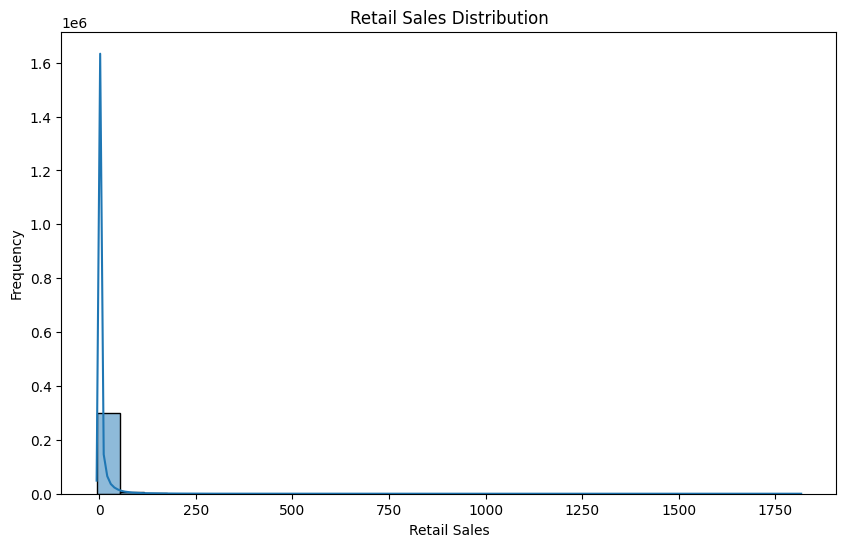

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['RETAIL SALES'], bins=30, kde=True)
plt.title('Retail Sales Distribution')
plt.xlabel('Retail Sales')
plt.ylabel('Frequency')
plt.show()


Sales Over Time (using RETAIL SALES)


<ipython-input-8-563e9469c8ca>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_cleaned.set_index('Date').resample('M')['RETAIL SALES'].sum().plot()


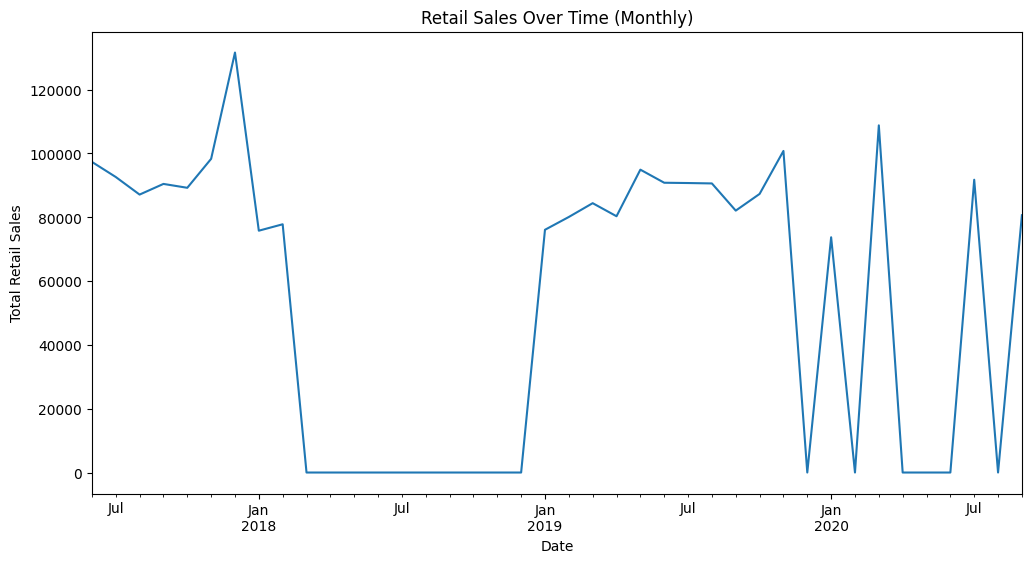

In [8]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['YEAR'].astype(str) + '-' + df_cleaned['MONTH'].astype(str))

plt.figure(figsize=(12, 6))
df_cleaned.set_index('Date').resample('M')['RETAIL SALES'].sum().plot()
plt.title('Retail Sales Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Retail Sales')
plt.show()


Sales by Product


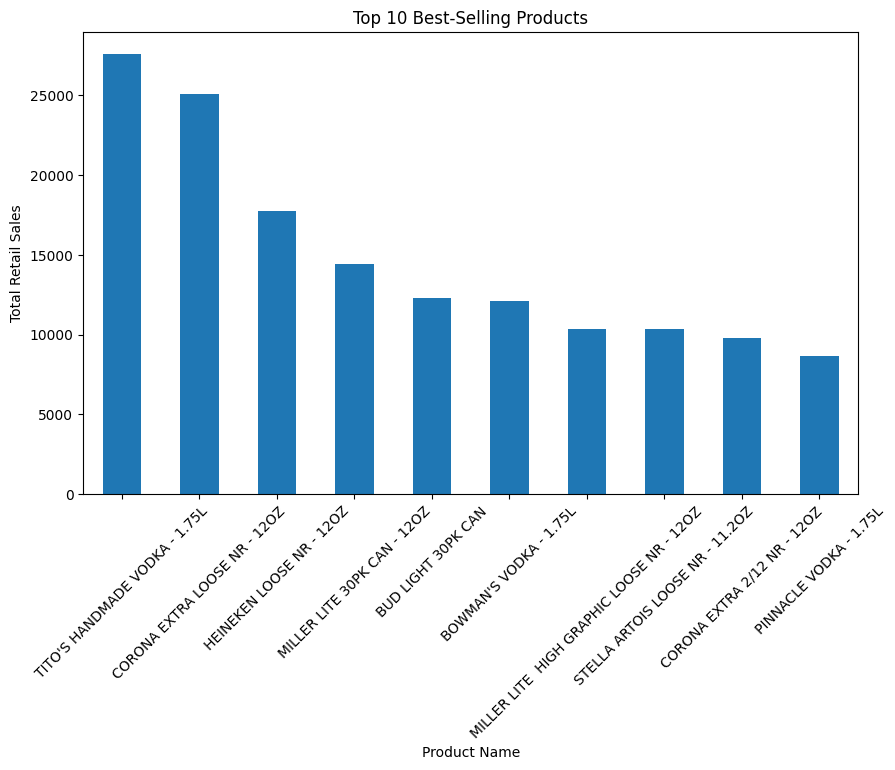

In [9]:
top_products = df_cleaned.groupby('ITEM DESCRIPTION')['RETAIL SALES'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Retail Sales')
plt.xticks(rotation=45)
plt.show()


Product Performance (using ITEM DESCRIPTION and RETAIL SALES)

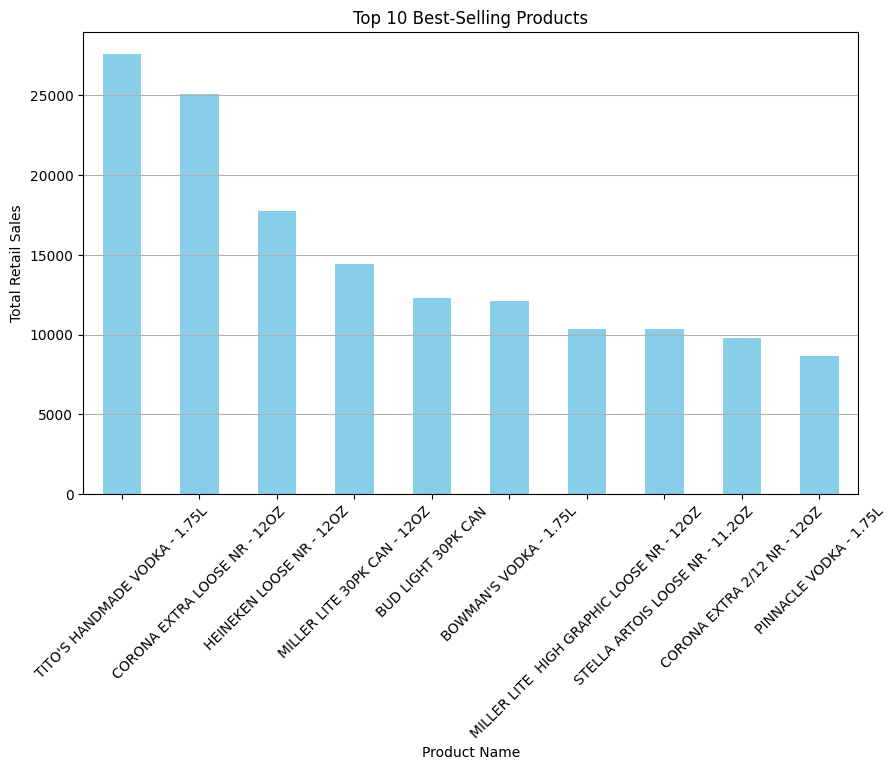

In [13]:
top_products = df_cleaned.groupby('ITEM DESCRIPTION')['RETAIL SALES'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Retail Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Supplier Analysis

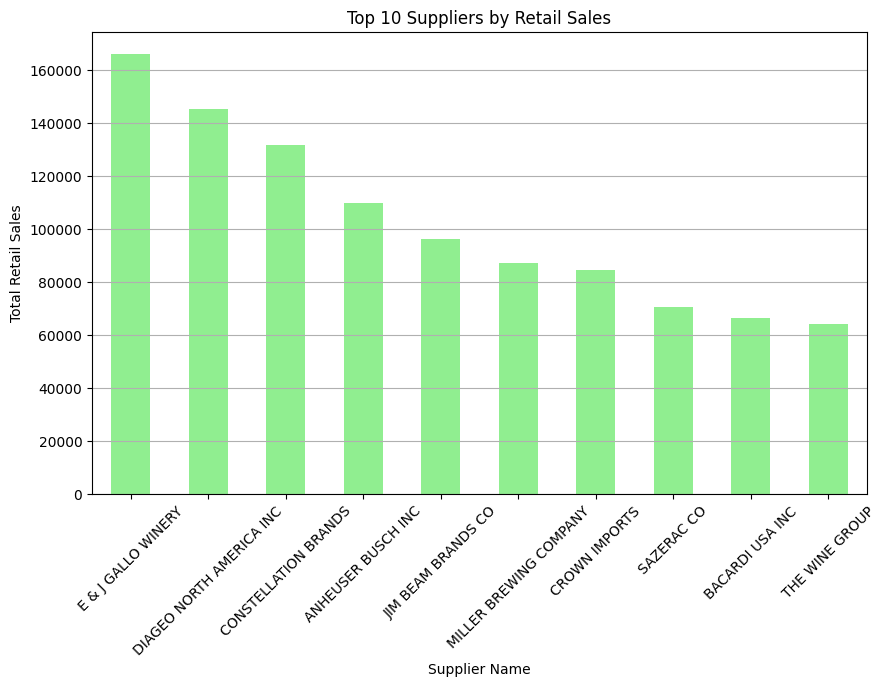

In [14]:
top_suppliers = df_cleaned.groupby('SUPPLIER')['RETAIL SALES'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_suppliers.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Suppliers by Retail Sales')
plt.xlabel('Supplier Name')
plt.ylabel('Total Retail Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
